<a href="https://colab.research.google.com/github/PanavShah1/dogs_cats/blob/main/dogs_cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn

torch.__version__

'2.3.0+cu121'

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [3]:
import requests
import zipfile
from pathlib import Path

# Setup path to a data folder
data_path = Path("data/")
image_path = data_path / "cats_dogs"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
  print(f"{image_path} directory already exists... skipping download")
else:
  print(f"{image_path} does not exist... creating one")
  image_path.mkdir(parents=True, exist_ok=True)

# Download data
with open(data_path / "cats_dogs.zip", "wb") as f:
  request = requests.get("https://github.com/PanavShah1/dogs_cats/blob/main/dogs_cats.zip?raw=true")
  print("Downloading data...")
  f.write(request.content)

# Unzip data
with zipfile.ZipFile(data_path / "cats_dogs.zip", "r") as zip_ref:
  print("Unzipping data...")
  zip_ref.extractall(image_path)


data/cats_dogs does not exist... creating one
Unzipping data...


In [4]:
import os
for dirpath, dirnames, filenames in os.walk(image_path):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in data/cats_dogs
There are 1 directories and 0 images in data/cats_dogs/training_set
There are 2 directories and 0 images in data/cats_dogs/training_set/training_set
There are 0 directories and 4001 images in data/cats_dogs/training_set/training_set/cats
There are 0 directories and 4006 images in data/cats_dogs/training_set/training_set/dogs
There are 1 directories and 0 images in data/cats_dogs/test_set
There are 2 directories and 0 images in data/cats_dogs/test_set/test_set
There are 0 directories and 1012 images in data/cats_dogs/test_set/test_set/cats
There are 0 directories and 1013 images in data/cats_dogs/test_set/test_set/dogs


In [5]:
train_path = image_path / "training_set/training_set"
test_path = image_path / "test_set/test_set"
os.listdir(train_path), os.listdir(test_path)

(['cats', 'dogs'], ['cats', 'dogs'])

In [6]:
train_path_set = list(train_path.glob("*/*.jpg"))
test_path_set = list(test_path.glob("*/*.jpg"))
len(train_path_set), len(test_path_set)

(8005, 2023)

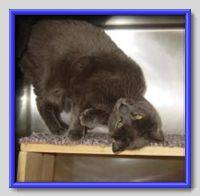

In [7]:
from PIL import Image

img = Image.open(train_path_set[0])
img

In [8]:
img.size

(200, 196)

In [9]:
train_path_set[0].parent.stem

'cats'

array([[[219, 215, 212],
        [219, 215, 212],
        [219, 216, 211],
        ...,
        [216, 216, 216],
        [216, 216, 216],
        [216, 216, 216]],

       [[219, 215, 212],
        [219, 215, 212],
        [219, 215, 212],
        ...,
        [216, 216, 216],
        [216, 216, 216],
        [216, 216, 216]],

       [[219, 216, 211],
        [219, 215, 212],
        [219, 215, 212],
        ...,
        [216, 216, 216],
        [216, 216, 216],
        [216, 216, 216]],

       ...,

       [[216, 216, 216],
        [216, 216, 216],
        [216, 216, 216],
        ...,
        [216, 216, 216],
        [216, 216, 216],
        [216, 216, 216]],

       [[216, 216, 216],
        [216, 216, 216],
        [216, 216, 216],
        ...,
        [216, 216, 216],
        [216, 216, 216],
        [216, 216, 216]],

       [[216, 216, 216],
        [216, 216, 216],
        [216, 216, 216],
        ...,
        [216, 216, 216],
        [216, 216, 216],
        [216, 216, 216]]], dtype=uint8)
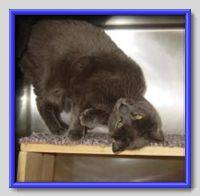

In [10]:
import numpy as np
img_array = np.asarray(img)
img_array

In [115]:
# Transform data
from torchvision import transforms
train_transform = transforms.Compose([
    transforms.Resize([64, 64]),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor()
])
test_transform = transforms.Compose([
    transforms.Resize([64, 64]),
    transforms.ToTensor()
])

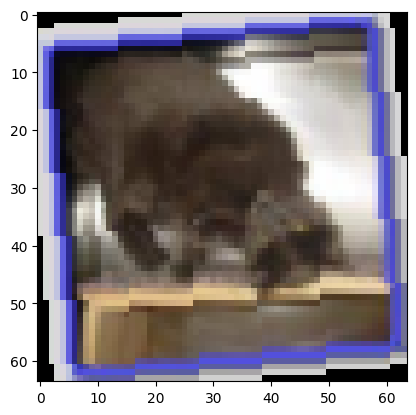

In [116]:
import matplotlib.pyplot as plt
transformed_img = train_transform(img)
plt.imshow(transformed_img.permute(1, 2, 0))

In [117]:
def create_dataset(path: Path,
                   transform: transforms.Compose,
                   device: device):
  path_list = list(path.glob("*/*.jpg"))
  dataset = []
  for img_path in path_list:
    img = Image.open(img_path)
    transformed_img = transform(img)
    img_title = img_path.parent.stem
    if img_title == "cats":
      # print("cat")
      img_title = 0
    else:
      # print("dog")
      img_title = 1
    dataset.append((transformed_img, img_title))

  return dataset

In [118]:
train_dataset = create_dataset(path=train_path,
                              transform=train_transform,
                              device=device)
test_dataset = create_dataset(path=test_path,
                              transform=test_transform,
                              device=device)

1
torch.Size([3, 64, 64])


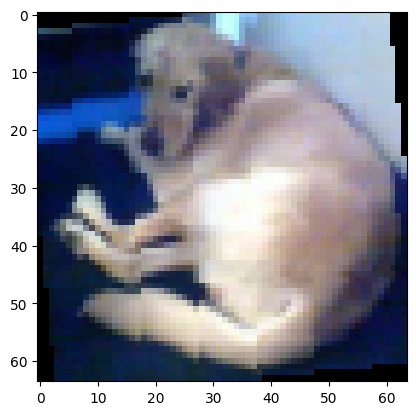

In [119]:
X, y = train_dataset[5000]
print(y)
print(X.shape)
plt.imshow(X.permute(1, 2, 0))

In [120]:
from torch.utils.data import DataLoader
torch.manual_seed(42)
train_dataloader = DataLoader(train_dataset,
                              batch_size=32,
                              shuffle=True)
test_dataloader = DataLoader(test_dataset,
                             batch_size=32,
                             shuffle=False)

In [121]:
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x78462048e290>,
 <torch.utils.data.dataloader.DataLoader at 0x78462048e5f0>)

In [122]:
for i, (data, target) in enumerate(train_dataloader):
    if i >= 250 and i<400:  # Checking first 3 batches
      print(f"Batch {i} - Target: {target}")
      break


Batch 250 - Target: tensor([0, 1, 0, 0, 1])


In [123]:
dataset = next(iter(train_dataloader))
dataset[0].shape, dataset[1], dataset[0]

(torch.Size([32, 3, 64, 64]),
 tensor([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
         1, 0, 0, 1, 0, 1, 1, 1]),
 tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
 
          [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
 
          [[

In [124]:
# Create model
import torch.nn
class DogsCats(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_layers: int,
               output_shape: int):
    super().__init__()
    self.layer_1 = nn.Sequential(
      nn.Conv2d(in_channels=input_shape,
                out_channels=hidden_layers,
                kernel_size=3,
                stride=1,
                padding=1),
      # nn.ReLU(),
      # nn.Conv2d(in_channels=hidden_layers,
      #           out_channels=hidden_layers,
      #           kernel_size=3,
      #           stride=1,
      #           padding=1),
      # nn.ReLU(),
      nn.MaxPool2d(kernel_size=2,
                   stride=2)
  )
    self.layer_2 = nn.Sequential(
      nn.Conv2d(in_channels=hidden_layers,
                out_channels=hidden_layers,
                kernel_size=3,
                stride=1,
                padding=1),
      # nn.ReLU(),
      # nn.Conv2d(in_channels=hidden_layers,
      #           out_channels=hidden_layers,
      #           kernel_size=3,
      #           stride=1,
      #           padding=1),
      # nn.ReLU(),
      nn.MaxPool2d(kernel_size=2,
                   stride=2)
  )
    self.layer_3 = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features= hidden_layers*16*16,
                  out_features= 128),
        nn.ReLU(),
        nn.Linear(in_features= 128,
                  out_features= output_shape)
    )

  def forward(self, x):
    x = self.layer_1(x)
    # print(x.shape)
    x = self.layer_2(x)
    # print(x.shape)
    x = self.layer_3(x)
    # print(x.shape)
    return x


In [133]:
model_0 = DogsCats(input_shape=3,
                   hidden_layers=10,
                   output_shape=2)
model_0

DogsCats(
  (layer_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer_3): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=128, bias=True)
    (2): ReLU()
    (3): Linear(in_features=128, out_features=2, bias=True)
  )
)

In [134]:
model_0(dataset[0])

tensor([[-0.0766, -0.0739],
        [-0.0697, -0.0865],
        [-0.0607, -0.0620],
        [-0.0607, -0.0818],
        [-0.0397, -0.0739],
        [-0.0162, -0.0440],
        [-0.0282, -0.0843],
        [-0.0532, -0.0784],
        [-0.0639, -0.0887],
        [-0.0622, -0.0742],
        [-0.0421, -0.0684],
        [-0.0616, -0.0971],
        [-0.0881, -0.0801],
        [-0.0731, -0.0662],
        [-0.0322, -0.0557],
        [-0.0362, -0.0628],
        [-0.0314, -0.0617],
        [-0.0706, -0.0790],
        [-0.0557, -0.0726],
        [-0.0487, -0.0724],
        [-0.0477, -0.0702],
        [-0.0488, -0.0854],
        [-0.0802, -0.0508],
        [-0.0506, -0.0691],
        [-0.0875, -0.0690],
        [-0.0654, -0.0603],
        [-0.0884, -0.0669],
        [-0.0226, -0.0509],
        [-0.0766, -0.0453],
        [-0.0678, -0.0645],
        [-0.0554, -0.0887],
        [-0.0854, -0.0893]], grad_fn=<AddmmBackward0>)

In [135]:
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo

from torchinfo import summary
summary(model_0, (1, 3, 64, 64))

Layer (type:depth-idx)                   Output Shape              Param #
DogsCats                                 [1, 2]                    --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─MaxPool2d: 2-2                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-3                       [1, 10, 32, 32]           910
│    └─MaxPool2d: 2-4                    [1, 10, 16, 16]           --
├─Sequential: 1-3                        [1, 2]                    --
│    └─Flatten: 2-5                      [1, 2560]                 --
│    └─Linear: 2-6                       [1, 128]                  327,808
│    └─ReLU: 2-7                         [1, 128]                  --
│    └─Linear: 2-8                       [1, 2]                    258
Total params: 329,256
Trainable params: 329,256
Non-trainable params: 0
Total

In [136]:
# Create train_step()
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device=device):
  # Put the model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # Loop through data loader data batches
  for batch, (X, y) in enumerate(dataloader):
    y = torch.Tensor(y)
    X, y = X.to(device), y.to(device)
    # 1. Forward pass
    y_pred = model(X) # output model logits

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Calculate accuracy metric
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class==y).sum().item()/len(y_pred)

  # Adjust metrics to get average loss and accuracy per batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc

In [137]:
# Create a test step
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device=device):
  print("start")
  # Put model in eval mode
  model.eval()

  # Setup test loss and test accuracy values
  test_loss, test_acc = 0, 0

  # Turn on inference mode
  with torch.inference_mode():
    # Loop through DataLoader batches
    for batch, (X, y) in enumerate(dataloader):
      # print("y", y)
      X, y = X.to(device), y.to(device)
      # 1. Forward pass
      test_pred_logits = model(X)

      # 2. Calculate the loss
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()

      # Calculate the accuracy
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [138]:
from tqdm.auto import tqdm

# 1. Create a train function that takes in various model parameters + optimizer + dataloaders + loss function
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module,
          epochs: int = 5,
          device = device):

  # 2. Create empty results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}
  # 3. Loop through training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model=model,
                                      dataloader=train_dataloader,
                                      loss_fn=loss_fn,
                                      optimizer=optimizer,
                                      device=device)
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn,
                                    device=device)

    # 5. Print out what's happening
    print(f"Epoch: {epoch} | Train loss: {train_loss:.4f} | Train acc: {train_acc:.4f} | Test loss: {test_loss:4f} | Test acc: {test_acc:.4f}")
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  # 6. Return the filled results at the end of the loop
  return results


In [141]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 30


# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_0.parameters(), lr=0.001, weight_decay=1e-4)

# Start the timer
from timeit import default_timer as timer
start_time = timer()
# Train model_0
model_0_results = train(model=model_0.to(device),
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/30 [00:00<?, ?it/s]

start
Epoch: 0 | Train loss: 0.0570 | Train acc: 0.9843 | Test loss: 1.300772 | Test acc: 0.7118
start
Epoch: 1 | Train loss: 0.0328 | Train acc: 0.9927 | Test loss: 1.487708 | Test acc: 0.7035
start
Epoch: 2 | Train loss: 0.0388 | Train acc: 0.9887 | Test loss: 1.548393 | Test acc: 0.6950
start
Epoch: 3 | Train loss: 0.0442 | Train acc: 0.9848 | Test loss: 1.630484 | Test acc: 0.7047
start
Epoch: 4 | Train loss: 0.0244 | Train acc: 0.9933 | Test loss: 1.777063 | Test acc: 0.7031
start
Epoch: 5 | Train loss: 0.0136 | Train acc: 0.9974 | Test loss: 1.796860 | Test acc: 0.7131
start
Epoch: 6 | Train loss: 0.0099 | Train acc: 0.9975 | Test loss: 1.848466 | Test acc: 0.7109
start
Epoch: 7 | Train loss: 0.0538 | Train acc: 0.9823 | Test loss: 1.763316 | Test acc: 0.7009
start
Epoch: 8 | Train loss: 0.0660 | Train acc: 0.9781 | Test loss: 1.973978 | Test acc: 0.7099
start
Epoch: 9 | Train loss: 0.0203 | Train acc: 0.9948 | Test loss: 1.887495 | Test acc: 0.7109
start
Epoch: 10 | Train loss: 

In [149]:
model_path = Path("models")
model_0_path = model_path / "model_0.pth"

if model_path.is_dir():
  print(f"{model_0_path} already exists... skipping download")
else:
  print(f"{model_0_path} does not exist... creating one")
  model_path.mkdir(parents=True, exist_ok=True)


torch.save(obj=model_0.state_dict(),
           f=model_0_path)

models/model_0.pth does not exist... creating one


In [150]:
loaded_model = DogsCats(input_shape=3,
                       hidden_layers=10,
                       output_shape=2)
loaded_model.load_state_dict(torch.load(model_0_path))
loaded_model.to(device)
loaded_model

DogsCats(
  (layer_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer_3): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=128, bias=True)
    (2): ReLU()
    (3): Linear(in_features=128, out_features=2, bias=True)
  )
)